In [1]:
df = read.csv('adult.csv')
head(df)

age workclass fnlwgt education    educational.num marital.status    
1 25  Private   226802 11th          7              Never-married     
2 38  Private    89814 HS-grad       9              Married-civ-spouse
3 28  Local-gov 336951 Assoc-acdm   12              Married-civ-spouse
4 44  Private   160323 Some-college 10              Married-civ-spouse
5 18  ?         103497 Some-college 10              Never-married     
6 34  Private   198693 10th          6              Never-married     
  occupation        relationship  race  gender capital.gain capital.loss
1 Machine-op-inspct Own-child     Black Male      0         0           
2 Farming-fishing   Husband       White Male      0         0           
3 Protective-serv   Husband       White Male      0         0           
4 Machine-op-inspct Husband       Black Male   7688         0           
5 ?                 Own-child     White Female    0         0           
6 Other-service     Not-in-family White Male      0         0           
  hours.per.week native.country income
1 40             United-States  <=50K 
2 50             United-States  <=50K 
3 40             United-States  >50K  
4 40             United-States  >50K  
5 30             United-States  <=50K 
6 30             United-States  <=50K

In [2]:
str(df)

'data.frame':	48842 obs. of  15 variables:
 $ age            : int  25 38 28 44 18 34 29 63 24 55 ...
 $ workclass      : chr  "Private" "Private" "Local-gov" "Private" ...
 $ fnlwgt         : int  226802 89814 336951 160323 103497 198693 227026 104626 369667 104996 ...
 $ education      : chr  "11th" "HS-grad" "Assoc-acdm" "Some-college" ...
 $ educational.num: int  7 9 12 10 10 6 9 15 10 4 ...
 $ marital.status : chr  "Never-married" "Married-civ-spouse" "Married-civ-spouse" "Married-civ-spouse" ...
 $ occupation     : chr  "Machine-op-inspct" "Farming-fishing" "Protective-serv" "Machine-op-inspct" ...
 $ relationship   : chr  "Own-child" "Husband" "Husband" "Husband" ...
 $ race           : chr  "Black" "White" "White" "Black" ...
 $ gender         : chr  "Male" "Male" "Male" "Male" ...
 $ capital.gain   : int  0 0 0 7688 0 0 0 3103 0 0 ...
 $ capital.loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week : int  40 50 40 40 30 30 40 32 40 10 ...
 $ native.country : chr  "United-Sta

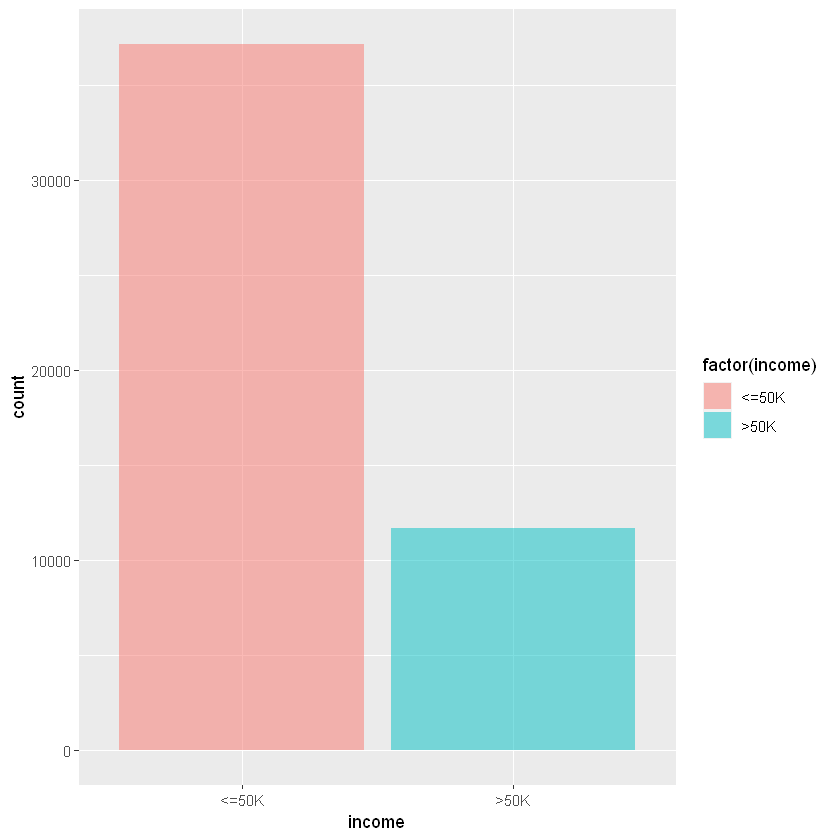

In [3]:
library(ggplot2)
ggplot(df,aes(income)) + geom_bar(aes(fill=factor(income)),alpha=0.5)

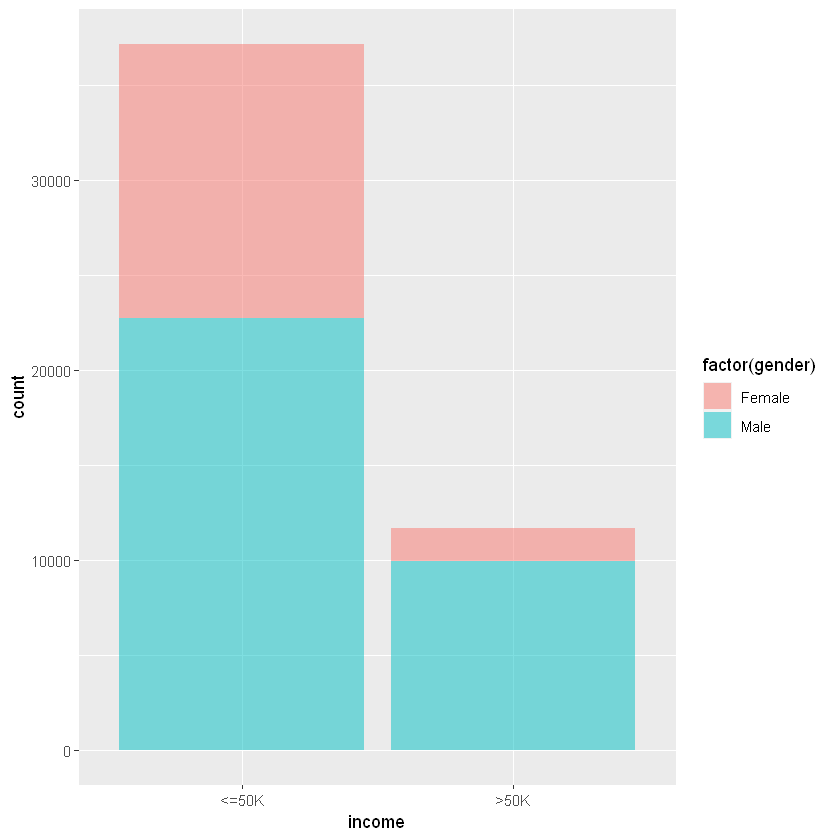

In [4]:
ggplot(df,aes(income)) + geom_bar(aes(fill=factor(gender)),alpha=0.5)

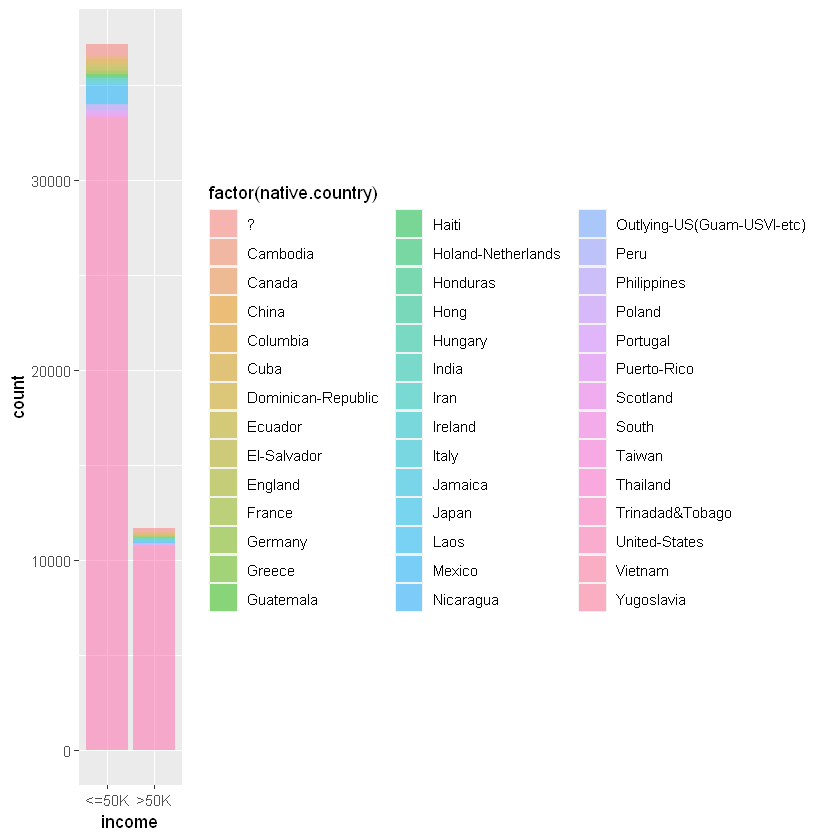

In [5]:
ggplot(df,aes(income)) + geom_bar(aes(fill=factor(native.country)),alpha=0.5)

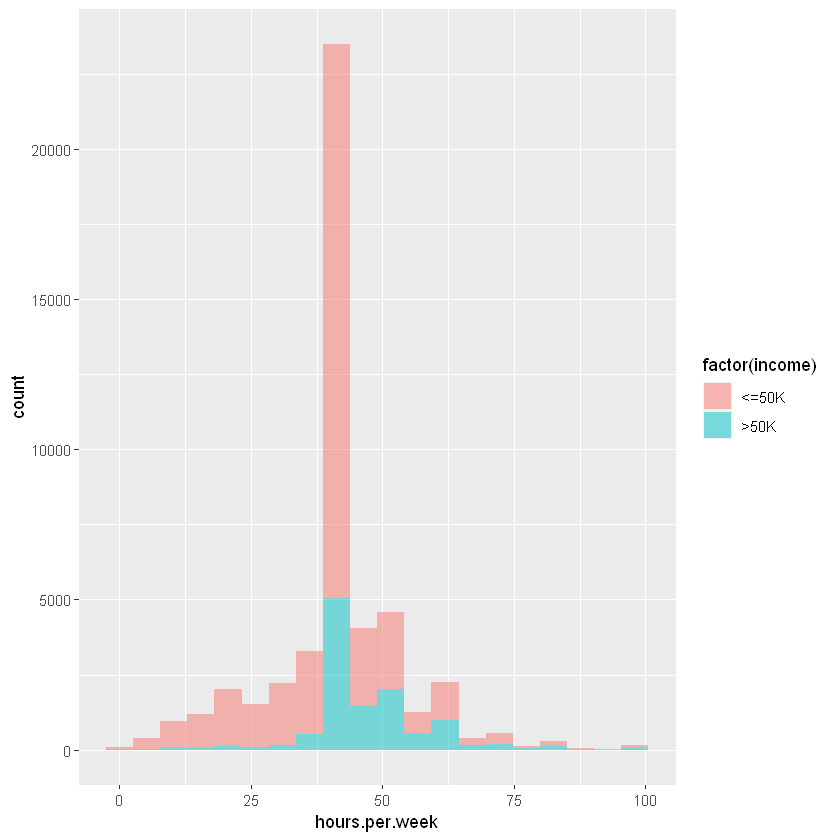

In [6]:
ggplot(df,aes(hours.per.week)) + geom_histogram(aes(fill=factor(income)),bins=20,alpha=0.5)

In [7]:
chr.cols <- sapply(df, is.character)

In [8]:
new.df = df[chr.cols]

In [9]:
library(superml)

label <- LabelEncoder$new()
c = colnames(new.df)

for(i in c){
    df[[i]] = label$fit_transform(df[[i]])
}

Loading required package: R6



In [10]:
head(df)

age workclass fnlwgt education educational.num marital.status occupation
1 25  0         226802 0          7              0              0         
2 38  0          89814 1          9              1              1         
3 28  1         336951 2         12              1              2         
4 44  0         160323 3         10              1              0         
5 18  2         103497 3         10              0              3         
6 34  0         198693 4          6              0              4         
  relationship race gender capital.gain capital.loss hours.per.week
1 0            0    0         0         0            40            
2 1            1    0         0         0            50            
3 1            1    0         0         0            40            
4 1            0    0      7688         0            40            
5 0            1    1         0         0            30            
6 2            1    0         0         0            30            
  native.country income
1 0              0     
2 0              0     
3 0              1     
4 0              1     
5 0              0     
6 0              0

In [11]:
library(caTools)
set.seed(101)

split = sample.split(df$age, SplitRatio = 0.70)

train = subset(df, split == TRUE)
test = subset(df, split == FALSE)

In [12]:
library(class)

set.seed(101)
pred <- knn(train,test,train$income,k=1)
head(pred)

[1] 0 0 0 0 0 0
Levels: 0 1

In [13]:
mean(test$income != pred)

[1] 0.2662936

In [14]:
library(class)

set.seed(101)
pred <- knn(train,test,train$income,k=3)
head(pred)

mean(test$income != pred)

[1] 0 0 0 0 0 0
Levels: 0 1

[1] 0.2410428

In [15]:
pred = NULL
error.rate = NULL

for(i in 1:20){
    set.seed(101)
    pred = knn(train,test,train$income,k=i)
    error.rate[i] = mean(test$income != pred)
}

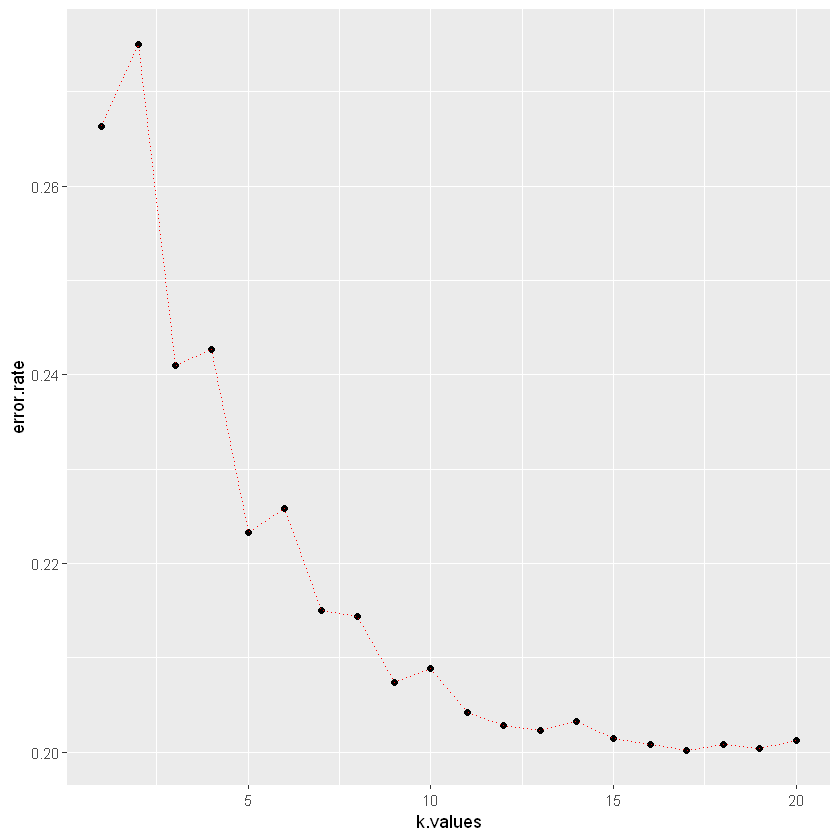

In [16]:
library(ggplot2)
k.values <- 1:20
error.df <- data.frame(error.rate,k.values)
ggplot(error.df,aes(x=k.values,y=error.rate)) + geom_point()+ geom_line(lty="dotted",color='red')